In [1]:
import sys 
import matplotlib.pyplot as plt
from glob import glob
import os
sys.path.append(os.path.join(os.getcwd(), "pyFlammarion"))

import ImagingTools as afm
import FileTools 
 

Found 10 .mi files
Processing file: N1_240924_151047.mi


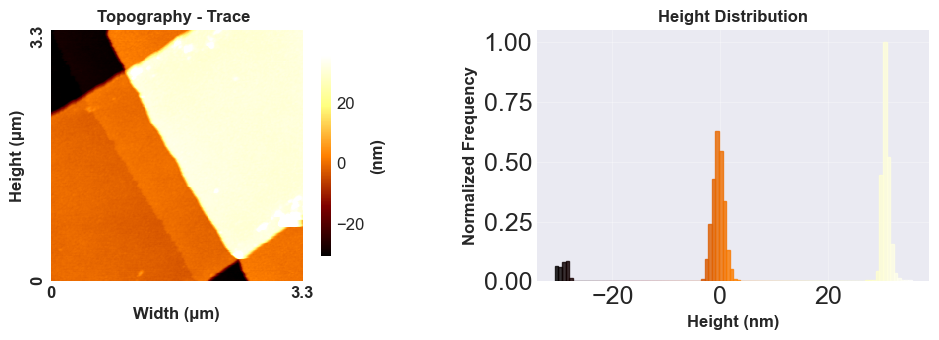


Processing file: N1_240924_152135.mi


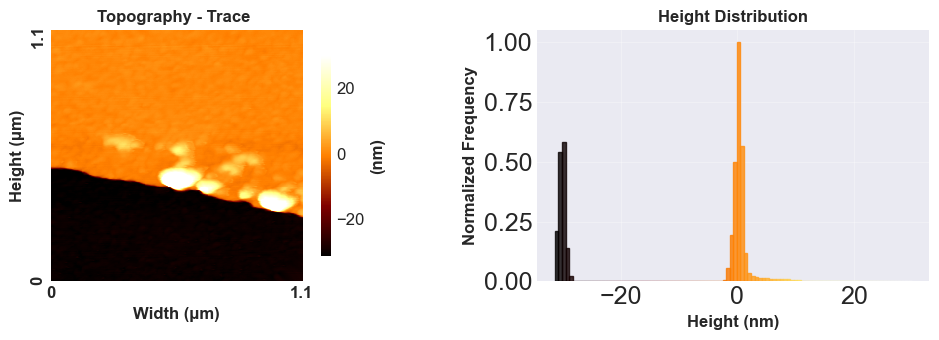


Processing file: pssivation_240924_140209.mi


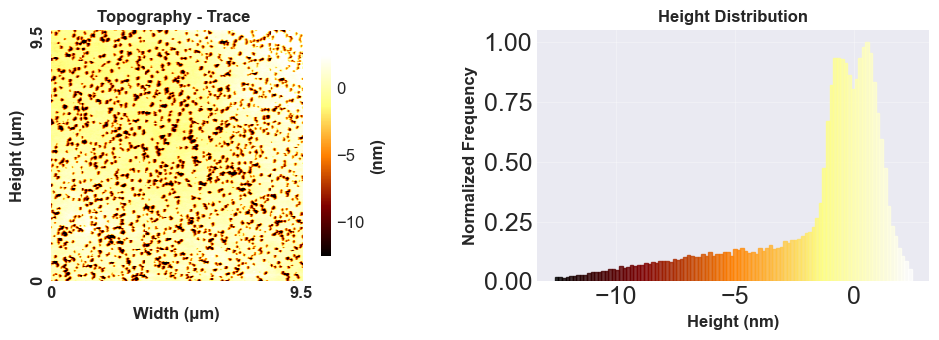


Processing file: w8_240924_141956.mi


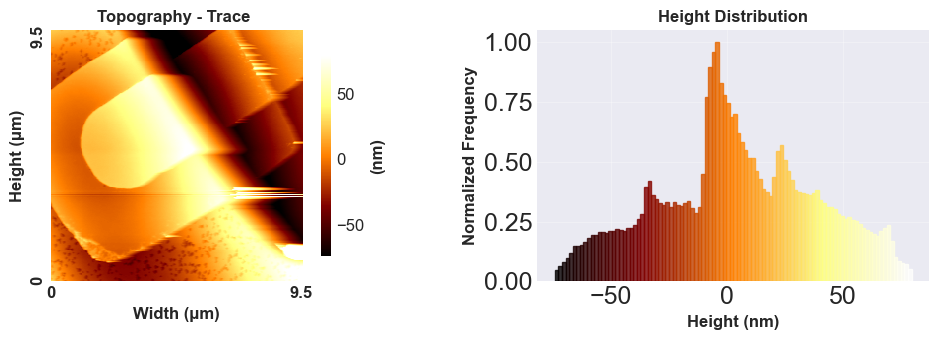


Processing file: w8_240924_142448.mi


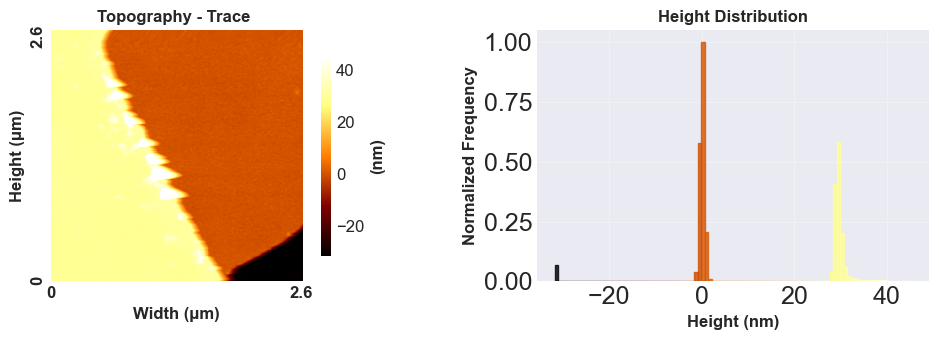


Processing file: w8_240924_143320.mi


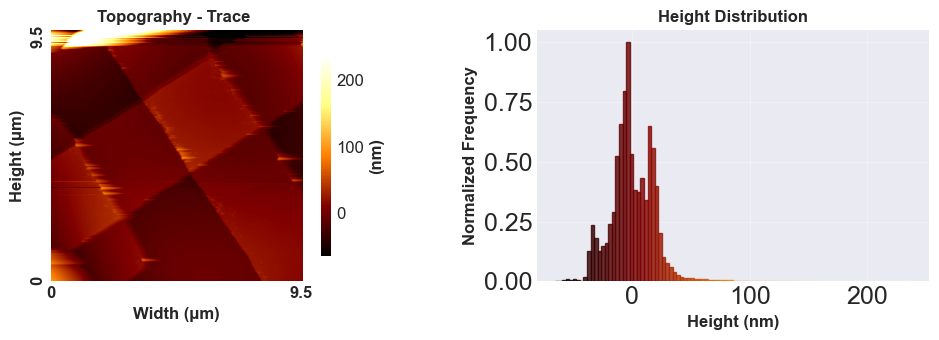


Processing file: w8_240924_143753.mi


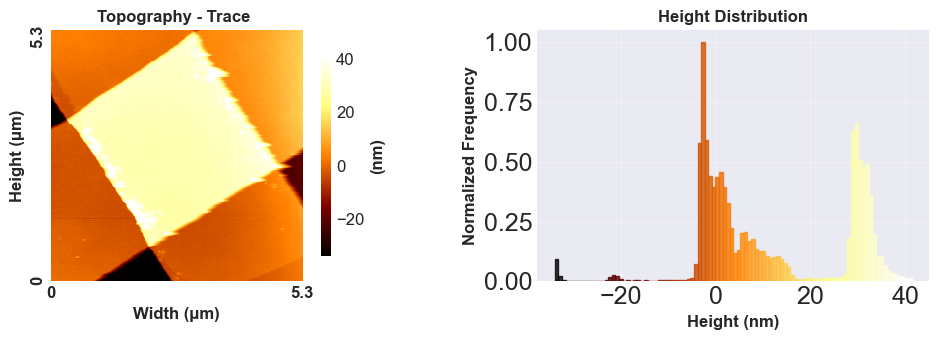


Processing file: w8_240924_144250.mi


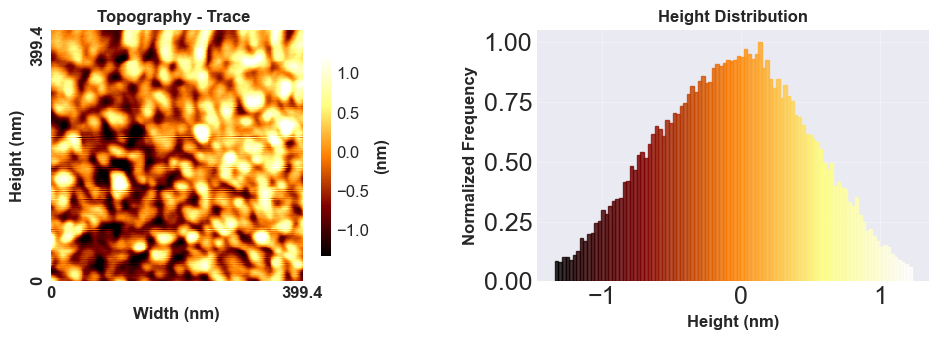


Processing file: w8_240924_145100.mi


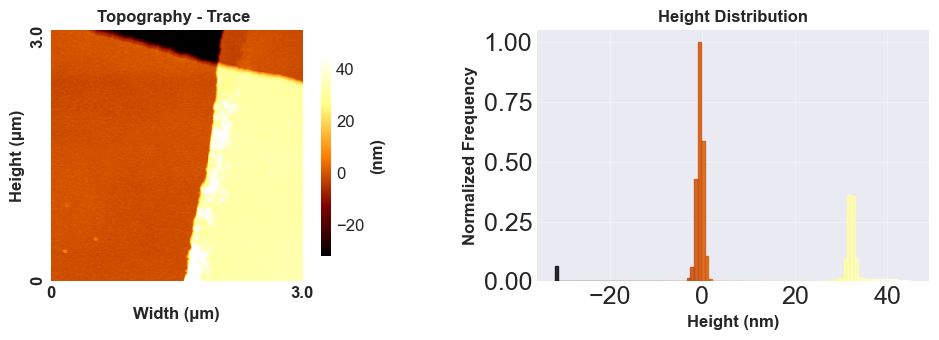


Processing file: w8_240924_145749.mi


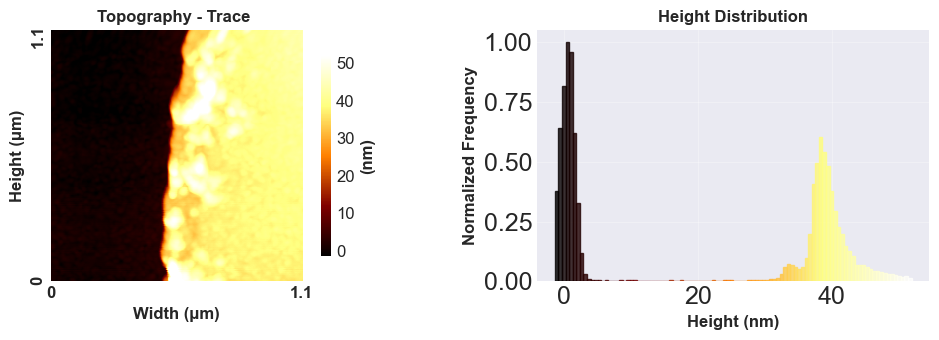

In [2]:

# Example usage
folder_path = r"S:\Research\Chip Fabrication Meeting Notes (Do not share without permission)\SharedData\AFM\W087\A2"  # Replace with your actual folder path
mi_files =FileTools. get_all_files(folder_path,'.mi', recursive=True)
print(f"Found {len(mi_files)} .mi files")
 

for mi_file in mi_files:
    print(f"Processing file: { os.path.basename( mi_file)}")
    images = afm.loadMI(mi_file)

    topographyImage = images["images"]["Topography_Trace"]


    lineFlattenedImage = afm.FlattenImage(
        topographyImage, afm.AFMFlatteningMethod.TrimmedMeanOfDifference, trim_ratio=0.25
    )

    leastSquarePlane = afm.FlattenImage(
        lineFlattenedImage,
        afm.AFMFlatteningMethod.PlaneLevel,
        fit_method=afm.RegressionMethod.LEAST_SQUARES,
    )

    terrace = afm.FlattenImage(leastSquarePlane, afm.AFMFlatteningMethod.TerracePlanes)

    terrace = afm.ZeroImageToFloor(terrace)


    afm.AFMPlot(terrace, title=f'{terrace['label']} - {terrace['direction']} ' , show_histogram=True, figsize=(5, 3.5))
    
    seg_results = afm.segment_afm_image_height(terrace  )
    segmentReport =afm. AnalyzeSegments(terrace, seg_results)
    
    plt.show()
     
    print("")
      